In [19]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns
from tqdm import tqdm



Text(0.5, 1.0, 'plot of error with changeing data size')

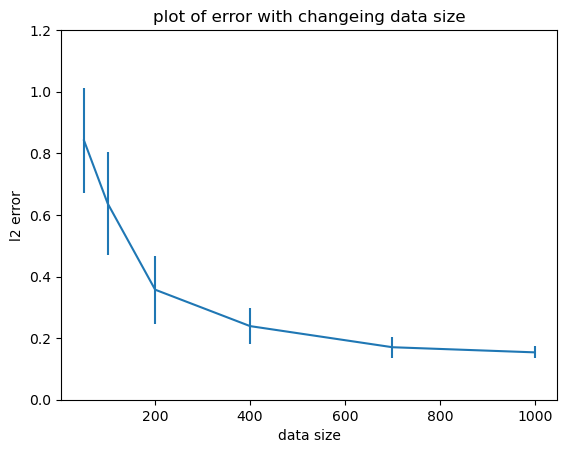

In [49]:
n = [50, 100, 200, 400, 700, 1000]
loss = [0.842010164, 0.6371482729,  0.35725591,
        0.23901605660, 0.1704251449934, 0.15375804]
std = [0.16972498079, 0.16663673767, 0.11097275,
       0.057786322, 0.0341767, 0.01925800]
plt.ylim(0,1.2)
plt.errorbar(n, loss, std)
plt.xlabel('data size')
plt.ylabel('l2 error')
plt.title('plot of error with changeing data size')

Text(0.5, 1.0, 'plot of error with changeing data dimension')

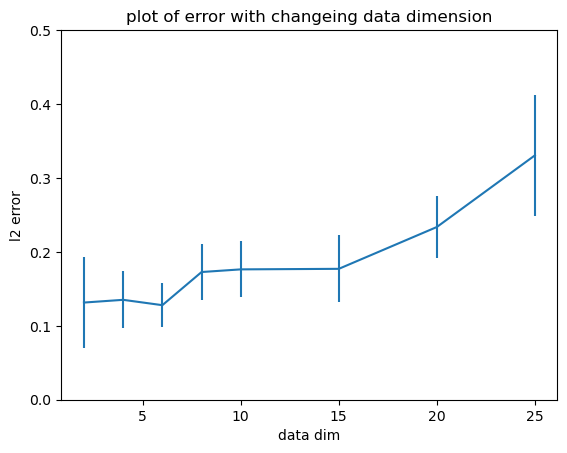

In [46]:
dim = [2 * i for i in range(1,6)]
dim = dim + [15, 20, 25]
loss = [0.1314519, 0.1351396, 0.127899696697, 0.172746410669,
        0.176335236369, 0.177069195508, 0.23363757,   0.3305367776498112]
std = [0.0612, 0.0383416, 0.030100317,
       0.0381205198135, 0.0379344232, 0.045520850, 0.0425008611 ,  0.0823358510985386]
plt.ylim(0, 0.5)
plt.errorbar(dim, loss, std)
plt.xlabel('data dim')
plt.ylabel('l2 error')
plt.title('plot of error with changeing data dimension')


Text(0.5, 1.0, 'plot of error with changeing eps')

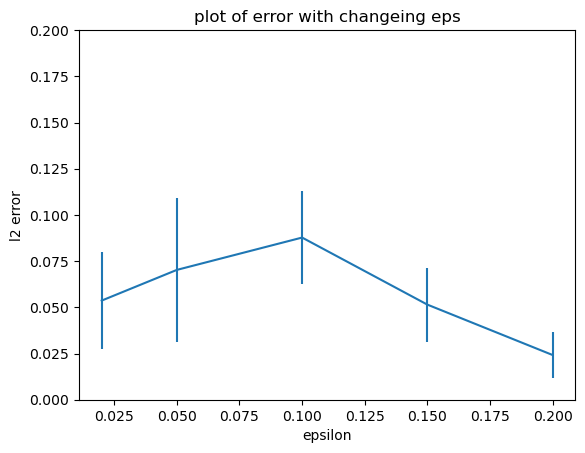

In [44]:
eps = [0.05 * i for i in range(1,5)]
eps = [0.02] + eps
loss = [0.0536475436726680, .07025363125430725, 0.0877484166048897,
        0.051465510482915054, 0.02419260722366376]
std = [0.02643529019273472, .03908587982982101, 0.025264870202517158,
       0.02001144603729361, 0.01246368785851463]
plt.ylim(0, 0.2)
plt.errorbar(eps, loss, std)
plt.xlabel('epsilon')
plt.ylabel('l2 error')
plt.title('plot of error with changeing eps')


100%|██████████| 1/1 [14:42<00:00, 882.57s/it]


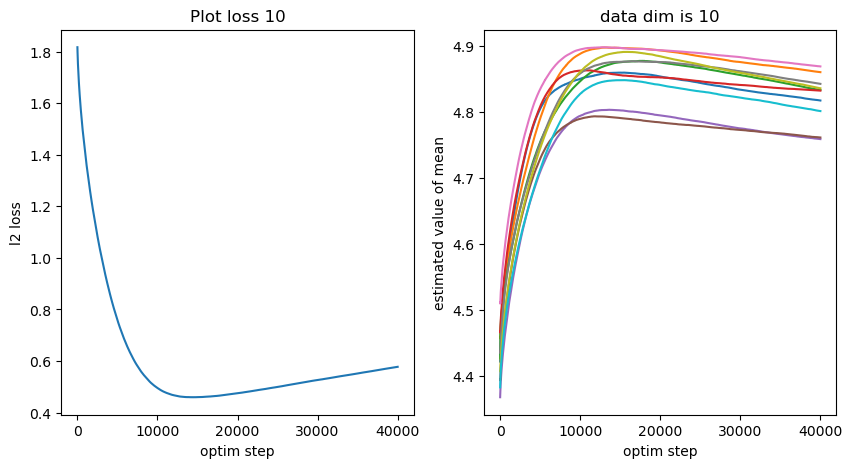

In [40]:
# 卒論プロット用
loss = []

for i in tqdm(range(1)):
    gan = GAN(data_dim=10, eps=0.3)
    gan.dist_init(setting='mu', true_mean=5, out_mean=0)
    gan.data_init(data_size=1000, mc_ratio=3)
    gan.model_init()
    gan.optimizer_init(lr_d=1, lr_g=0.02, decay_par=0.4,
                       reg_d=6e-5, reg_g=5e-5, update_D_iter=1)
    gan.fit(optim_iter=40000)
    # plt.subplots()
    loss.append(gan.score(100))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(gan.l2_loss)
    plt.xlabel('optim step')
    plt.ylabel('l2 loss')
    plt.title(f'Plot loss {gan.data_dim}')
    plt.subplot(1, 2, 2)
    plt.plot(np.array(gan.G_record))
    plt.xlabel('optim step')
    plt.ylabel('estimated value of mean')
    plt.title(f'data dim is {gan.data_dim}')
    # plt.legend()
loss = np.array(loss)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


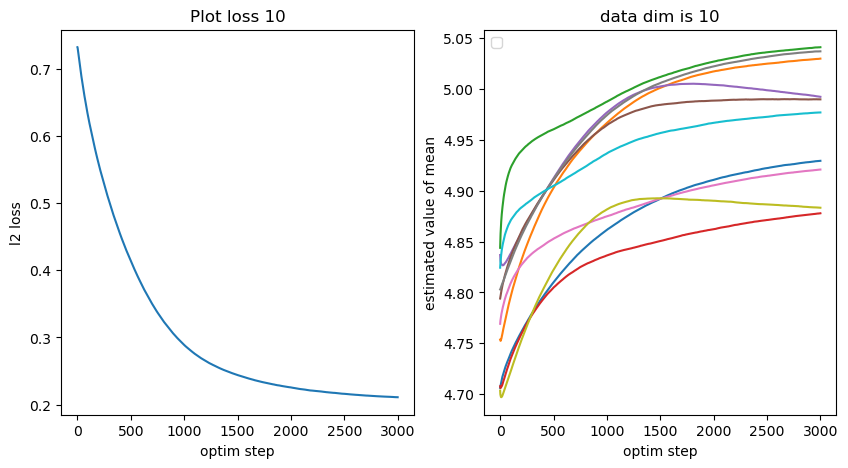

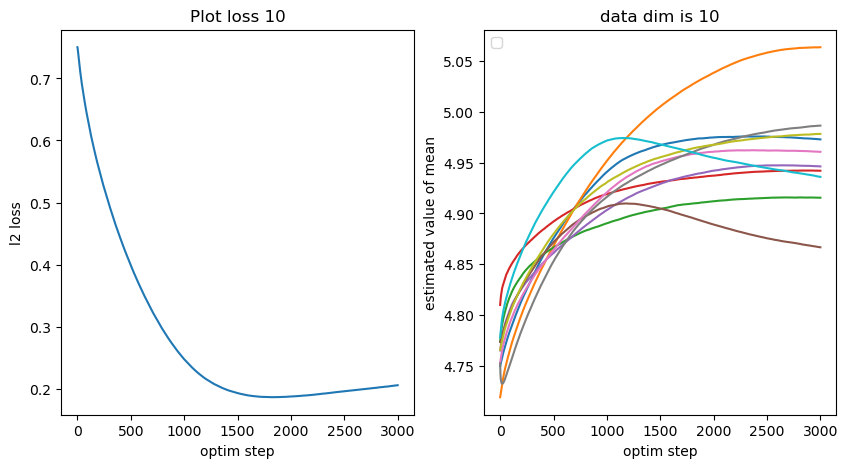

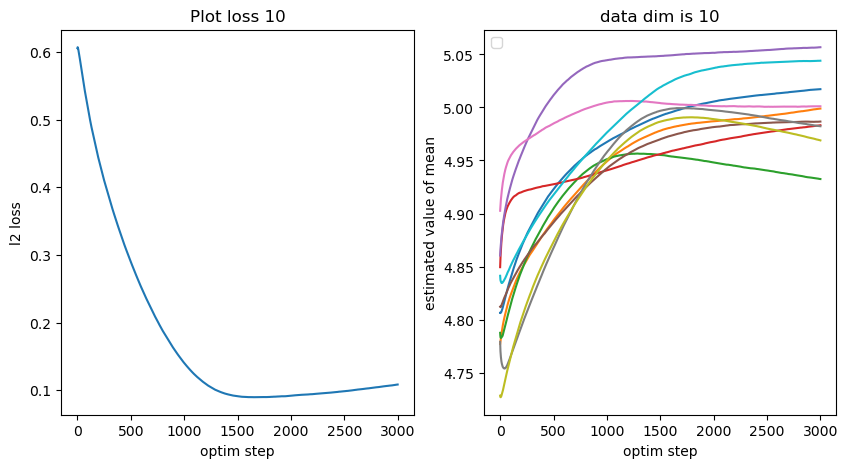

In [12]:
# 卒論プロット用
loss = []

for i in tqdm(range(3)):
    gan = GAN(data_dim=10, eps=0.15)
    gan.dist_init(setting='mu', true_mean=5, out_mean=0)
    gan.data_init(data_size=1000, mc_ratio=3)
    gan.model_init()
    gan.optimizer_init(lr_d=0.2, lr_g=0.02, decay_par=0.4,
                       reg_d=6e-5, reg_g=5e-5, update_D_iter=5)
    gan.fit(optim_iter=3000)
    # plt.subplots()
    loss.append(gan.score(100))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(gan.l2_loss)
    plt.xlabel('optim step')
    plt.ylabel('l2 loss')
    plt.title(f'Plot loss {gan.data_dim}')
    plt.subplot(1, 2, 2)
    plt.plot(np.array(gan.G_record))
    plt.xlabel('optim step')
    plt.ylabel('estimated value of mean')
    plt.title(f'data dim is {gan.data_dim}')
    # plt.legend()
loss = np.array(loss)

In [13]:
loss, np.mean(loss), np.std(loss)


(array([0.09144571, 0.13857134, 0.13630081, 0.01708008, 0.03409678,
        0.23995707, 0.11885431, 0.09779533, 0.12645781, 0.07060091]),
 0.10711601412522423,
 0.05924853717399106)